In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
from keras.models import load_model
from keras.utils.vis_utils import plot_model

from PIL import Image

from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [2]:
class CONFIG:
    INDEXS = ["R2", "EV", "ME", "MEAN_AE", "MSE", "MEDIAN_AE", "ACC"]
    N_SPLITS = 5

# Load Dataset

In [3]:
header = pd.read_csv("Dataset/header.csv", header=None)
header

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable


In [4]:
training_dataset = pd.read_csv("Dataset/Training/Features_Variant_5.csv",
                               header=None,
                               names=[header.iat[0, i] for i in range(0, 54)])
training_dataset.sample(n=10)

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable
186849,23055,0,67,36,0.0,473.0,20.073292,12.0,38.875573,0.0,...,0,1,0,1,0,0,0,0,0,0
33933,253349,0,1888,44,0.0,69.0,4.776316,2.0,7.395349,0.0,...,0,0,0,0,0,1,0,0,0,1
48766,4233,0,1005,18,0.0,45.0,6.016160,4.0,6.992577,0.0,...,0,0,1,0,0,0,0,0,0,1
35288,441897,0,16175,18,0.0,1206.0,99.891817,67.0,116.675692,0.0,...,0,0,1,0,0,0,0,0,0,0
137344,39611,3243,612,32,0.0,138.0,4.217703,1.0,14.235812,0.0,...,0,1,0,0,1,0,0,0,0,0
42283,2071999,156,150355,57,0.0,504.0,24.268775,12.0,49.660616,0.0,...,0,0,0,0,0,1,0,0,0,0
1622,798622,0,34668,5,0.0,1492.0,95.932897,7.0,220.410732,0.0,...,0,0,0,0,0,0,0,1,0,0
169890,1501889,0,33752,14,0.0,163.0,5.839713,3.0,16.913533,0.0,...,0,0,0,0,1,0,0,0,0,3
70693,55520,0,13,26,0.0,226.0,5.612142,1.0,20.556540,0.0,...,0,0,0,0,0,0,1,0,0,0
132810,1975842,35,140870,9,0.0,1126.0,134.743679,85.0,159.791824,0.0,...,0,0,0,0,0,0,1,0,0,159


In [5]:
features = training_dataset.iloc[:, :53]
features

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Thursday,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday
0,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.993640,0.0,...,0,0,0,0,0,0,0,1,0,0
1,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.993640,0.0,...,1,0,0,1,0,0,0,0,0,0
2,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.993640,0.0,...,0,1,0,0,0,0,0,0,0,1
3,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.993640,0.0,...,0,1,0,0,1,0,0,0,0,0
4,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.993640,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199025,7170111,70,497000,9,0.0,2164.0,466.975207,244.0,497.966169,0.0,...,0,0,0,0,0,0,1,0,0,0
199026,7170111,70,497000,9,0.0,2164.0,466.975207,244.0,497.966169,0.0,...,0,0,0,0,0,0,1,0,0,0
199027,7170111,70,497000,9,0.0,2164.0,466.975207,244.0,497.966169,0.0,...,0,0,0,0,0,0,1,0,0,0
199028,7170111,70,497000,9,0.0,2164.0,466.975207,244.0,497.966169,0.0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
features = training_dataset.iloc[:, :53]
derived_5 = features.iloc[:, 4:5]
derived_8 = features.iloc[:, 7:8]
derived_10 = features.iloc[:, 9:10]
derived_13 = features.iloc[:, 12:13]
derived_15 = features.iloc[:, 14:15]
derived_18 = features.iloc[:, 17:18]
derived_20 = features.iloc[:, 19:20]
derived_23 = features.iloc[:, 22:23]
derived_25 = features.iloc[:, 24:25]
previous_feature = features.iloc[:, :4]
latter_feature = features.iloc[:, 25:]
features = pd.concat((previous_feature, derived_5, derived_8, derived_10, derived_13, derived_15, derived_18, derived_20, derived_23, derived_25, latter_feature), axis=1)

features

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived8,Derived10,Derived13,Derived15,Derived18,...,Post published weekday-Thursday,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday
0,634995,0,463,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,634995,0,463,1,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0,1,0,0,0,0,0,0
2,634995,0,463,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
3,634995,0,463,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,1,0,0,0,0,0
4,634995,0,463,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199025,7170111,70,497000,9,0.0,244.0,0.0,79.0,0.0,60.0,...,0,0,0,0,0,0,1,0,0,0
199026,7170111,70,497000,9,0.0,244.0,0.0,79.0,0.0,60.0,...,0,0,0,0,0,0,1,0,0,0
199027,7170111,70,497000,9,0.0,244.0,0.0,79.0,0.0,60.0,...,0,0,0,0,0,0,1,0,0,0
199028,7170111,70,497000,9,0.0,244.0,0.0,79.0,0.0,60.0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
labels = training_dataset.iloc[:, -1:]
labels

,Target Variable
0,0
1,0
2,0
3,0
4,0
...,...
199025,203
199026,42
199027,51
199028,17


In [8]:
df = training_dataset
df.insert(46, "posted on weekday", (df["Post published weekday-Monday"] + df["Post published weekday-Tuesday"] + df["Post published weekday-Wednesday"] + df["Post published weekday-Thursday"] + df["Post published weekday-Friday"]).astype("int"))
df.head()

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Saturday,posted on weekday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable
0,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,1,0,0,0,0,1,0,0,0
1,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,1,1,0,0,0,0,0,0,0
2,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,1,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,1,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,1,0,0,0,0,1,0,0,0


In [9]:
df.insert(46, "posted on weekend", (df["Post published weekday-Sunday"] + df["Post published weekday-Saturday"]).astype("int"))
df.drop(["Post published weekday-Saturday", "Post published weekday-Sunday", "Post published weekday-Monday", "Post published weekday-Tuesday", "Post published weekday-Wednesday", "Post published weekday-Thursday", "Post published weekday-Friday"], axis = 1, inplace = True)
df.head()

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,posted on weekend,posted on weekday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable
0,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,1,0,0,0,0,1,0,0,0
1,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,1,1,0,0,0,0,0,0,0
2,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,1,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,1,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,1,0,0,0,0,1,0,0,0


In [10]:
features = df.iloc[:, :48]
labels = df.iloc[:, -1:]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.3, random_state=42)

# Fully Connected Neural Network

## Normalization

In [12]:
def normalize(X_train, X_test, y_train, y_test):
    x_scaler = StandardScaler()
    x_scaler.fit(X_train)
    X_train_norm = x_scaler.transform(X_train)
    X_test_norm = x_scaler.transform(X_test)
    y_scaler = StandardScaler()
    y_scaler.fit(y_train)
    y_train_norm = y_scaler.transform(y_train)
    y_test_norm = y_scaler.transform(y_test)
    return X_train_norm, X_test_norm, y_train_norm, y_test_norm

## Model Initialization

In [13]:
def create_model():
    # Sequential
    model = Sequential()
    model.add(Dense(units=50,
                    activation='relu',
                    input_shape=(features.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(units=30,
                    activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1, activation='linear'))
    model.compile(loss='mse', optimizer='adam')
    print(model.summary())
    return model

## Model Training

In [14]:
def train_model(model, X_train_norm, y_train_norm, X_test_norm, y_test_norm):
    train = model.fit(X_train_norm,
                      y_train_norm,
                      epochs=300,
                      batch_size=512,
                      verbose=1,
                      validation_data=(X_test_norm, y_test_norm))
    model.save('model_fcnn.h5')
    predict = model.predict(X_test_norm)
    plt.plot(train.history['loss'])  
    plt.plot(train.history['val_loss'])  
    plt.title('Model loss')  
    plt.ylabel('Loss')  
    plt.xlabel('Epoch')  
    plt.legend(['Train', 'Test'], loc='upper left')  
    plt.show()
    plt.figure(figsize=(10, 15))
    plot_model(model, to_file='model_fcnn.png', show_shapes=True)
    img = Image.open('model_fcnn.png', 'r')
    plt.imshow(np.asarray(img))
    plt.show()
    return predict

In [15]:
def plot_test_predict(y_train, y_test_norm, predict, axes=None, k=None):
    y_scaler = StandardScaler()
    y_scaler.fit(y_train)
    test_predict = pd.concat(
        [pd.DataFrame(y_scaler.inverse_transform(y_test_norm)),
         pd.DataFrame(y_scaler.inverse_transform(predict.reshape(-1, 1)))
    ], axis=1)
    headers =  ["Test", "Predict"]
    test_predict.columns = headers
    if axes is not None and k is not None:
        sns.lineplot(data=test_predict.sample(n=50), ax=axes[k]).set_title("Test Predict Curve k = " + str(k))
    else:
        sns.lineplot(data=test_predict.sample(n=50)).set_title("Test Predict Curve")
    plt.show()
    sns.residplot(x=y_scaler.inverse_transform(y_test_norm), 
                  y=y_scaler.inverse_transform(predict.reshape(-1, 1)), lowess=True).set_title("Residuals")
    plt.show()

## Model Evaluation

In [16]:
def evaluate(model, y_train, X_test_norm, y_test_norm, predict):
    y_scaler = StandardScaler()
    y_scaler.fit(y_train)
    
    # R-Squared
    r2 = r2_score(y_scaler.inverse_transform(y_test_norm),
                  y_scaler.inverse_transform(predict.reshape(-1, 1)))
    
    # Explained Variance Score
    ev = explained_variance_score(y_scaler.inverse_transform(y_test_norm),
                                  y_scaler.inverse_transform(predict.reshape(-1, 1)))
    
    # Max Error
    me = max_error(y_scaler.inverse_transform(y_test_norm), 
                   y_scaler.inverse_transform(predict.reshape(-1, 1)))
    
    # Mean Absolute Error
    mean_ae = mean_absolute_error(y_scaler.inverse_transform(y_test_norm),
                                  y_scaler.inverse_transform(predict.reshape(-1, 1)))
    
    # Mean Squared Error
    mse = mean_squared_error(y_scaler.inverse_transform(y_test_norm),
                             y_scaler.inverse_transform(predict.reshape(-1, 1)))
    
    # Median Absolute Error
    median_ae = median_absolute_error(y_scaler.inverse_transform(y_test_norm), 
                                      y_scaler.inverse_transform(predict.reshape(-1, 1)))
    
    # Hit@10
    hit = np.abs(
        y_scaler.inverse_transform(y_test_norm).flatten() - 
        y_scaler.inverse_transform(predict.reshape(-1, 1)).flatten()
    ) < 10
    acc = np.sum(hit) / hit.shape[0]
    
    return r2, ev, me, mean_ae, mse, median_ae, acc

## Final Model

In [17]:
def train_final_model():
    # Normalization
    X_train_norm, X_test_norm, y_train_norm, y_test_norm = normalize(X_train, X_test, y_train, y_test)

    # Model Initialization
    model = create_model()

    # Model Training
    predict = train_model(model, X_train_norm, y_train_norm, X_test_norm, y_test_norm)
    plot_test_predict(y_train, y_test_norm, predict)

    # Model Evaluation
    r2, ev, me, mean_ae, mse, median_ae, acc = evaluate(model, y_train, X_test_norm, y_test_norm, predict)

    results = pd.DataFrame({
        "Index": CONFIG.INDEXS, 
        "Mean": [r2, ev, me, mean_ae, mse, median_ae, acc]
    })
    print(results)

2021-10-26 13:35:37.386138: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-26 13:35:37.483450: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                2450      
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1530      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 4,011
Trainable params: 4,011
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/300
273/273 [==============================] - 1s 2ms/step - loss: 0.8338 - val_loss: 0.5160
Epoch 2/300
27

273/273 [==============================] - 1s 2ms/step - loss: 0.3581 - val_loss: 0.3613
Epoch 72/300
273/273 [==============================] - 1s 2ms/step - loss: 0.3442 - val_loss: 0.3033
Epoch 73/300
273/273 [==============================] - 1s 2ms/step - loss: 0.3578 - val_loss: 0.2802
Epoch 74/300
273/273 [==============================] - 1s 2ms/step - loss: 0.3496 - val_loss: 0.2954
Epoch 75/300
273/273 [==============================] - 1s 2ms/step - loss: 0.3503 - val_loss: 0.2960
Epoch 76/300
273/273 [==============================] - 1s 2ms/step - loss: 0.3694 - val_loss: 0.2844
Epoch 77/300
273/273 [==============================] - 1s 3ms/step - loss: 0.3478 - val_loss: 0.2772
Epoch 78/300
273/273 [==============================] - 1s 2ms/step - loss: 0.3415 - val_loss: 0.2874
Epoch 79/300
273/273 [==============================] - 1s 2ms/step - loss: 0.3433 - val_loss: 0.2753
Epoch 80/300
273/273 [==============================] - 0s 2ms/step - loss: 0.3669 - val_loss: 

Epoch 151/300
273/273 [==============================] - 0s 2ms/step - loss: 0.3132 - val_loss: 0.3071
Epoch 152/300
273/273 [==============================] - 0s 2ms/step - loss: 0.3135 - val_loss: 0.3125
Epoch 153/300
273/273 [==============================] - 0s 2ms/step - loss: 0.3174 - val_loss: 0.3010
Epoch 154/300
273/273 [==============================] - 0s 2ms/step - loss: 0.3138 - val_loss: 0.2860
Epoch 155/300
273/273 [==============================] - 0s 2ms/step - loss: 0.3198 - val_loss: 0.2868
Epoch 156/300
273/273 [==============================] - 1s 2ms/step - loss: 0.3077 - val_loss: 0.3081
Epoch 157/300
273/273 [==============================] - 1s 2ms/step - loss: 0.3141 - val_loss: 0.2921
Epoch 158/300
273/273 [==============================] - 0s 2ms/step - loss: 0.3112 - val_loss: 0.2856
Epoch 159/300
273/273 [==============================] - 0s 2ms/step - loss: 0.3235 - val_loss: 0.2969
Epoch 160/300
273/273 [==============================] - 0s 2ms/step - lo

273/273 [==============================] - 1s 2ms/step - loss: 0.2988 - val_loss: 0.3134
Epoch 231/300
273/273 [==============================] - 1s 2ms/step - loss: 0.2998 - val_loss: 0.2880
Epoch 232/300
273/273 [==============================] - 1s 2ms/step - loss: 0.2873 - val_loss: 0.2798
Epoch 233/300
273/273 [==============================] - 1s 2ms/step - loss: 0.3018 - val_loss: 0.2865
Epoch 234/300
273/273 [==============================] - 1s 2ms/step - loss: 0.2997 - val_loss: 0.2888
Epoch 235/300
273/273 [==============================] - 1s 2ms/step - loss: 0.2977 - val_loss: 0.2807
Epoch 236/300
273/273 [==============================] - 1s 2ms/step - loss: 0.2852 - val_loss: 0.3015
Epoch 237/300
273/273 [==============================] - 1s 2ms/step - loss: 0.2942 - val_loss: 0.3004
Epoch 238/300
273/273 [==============================] - 1s 2ms/step - loss: 0.3049 - val_loss: 0.2959
Epoch 239/300
273/273 [==============================] - 1s 2ms/step - loss: 0.3052 - v

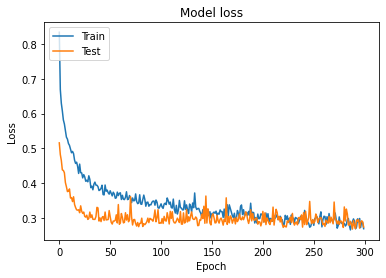

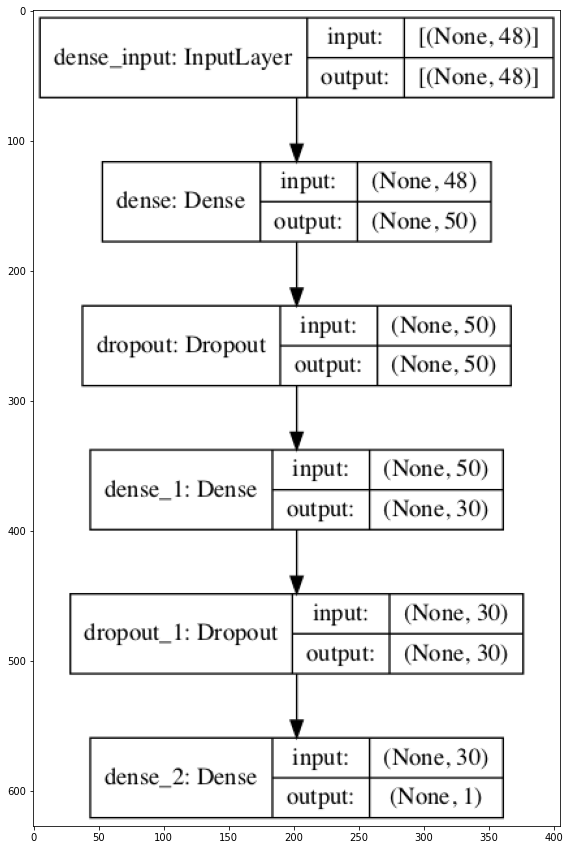

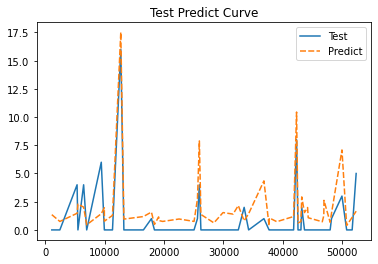

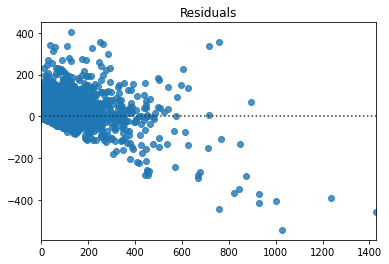

       Index        Mean
0         R2    0.668214
1         EV    0.668258
2         ME  935.978394
3    MEAN_AE    4.162674
4        MSE  340.452104
5  MEDIAN_AE    1.090015
6        ACC    0.929290


In [18]:
train_final_model()